In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Read data from preprocessed file

In [3]:
df = pd.read_csv("../data/internal/processed/IT Salary 2018_2019_2020_processed.csv")
df

,Year,Age,Gender,City,Position,Years of experience,Current level,Current Salary,Main language at work,Company size,Company type
0,2018,43.0,Male,München,QA Ingenieur,11.0,Senior,77000.0,Deutsch,100-1000,Product
1,2018,33.0,Female,München,Senior PHP Magento developer,8.0,Senior,65000.0,Deutsch,50-100,Product
2,2018,32.0,Male,München,Software Engineer,10.0,Senior,88000.0,Deutsch,1000+,Product
3,2018,25.0,Male,München,Senior Frontend Developer,6.0,Senior,78000.0,English,1000+,Product
4,2018,39.0,Male,München,UX Designer,10.0,Senior,69000.0,English,100-1000,Ecom retailer
...,...,...,...,...,...,...,...,...,...,...,...
2869,2020,31.0,Male,Berlin,Backend Developer,9.0,Senior,70000.0,English,51-100,Product
2870,2020,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,Senior,60000.0,English,1000+,Product
2871,2020,39.0,Male,Munich,IT Operations Manager,15.0,Lead,110000.0,English,101-1000,eCommerce
2872,2020,26.0,Male,Saarbrücken,Frontend Developer,7.0,Middle,38350.0,German,101-1000,Product


# Question 1
## How are salaries distributed at different levels?
### Meaning
- Understand what levels there are in the IT field
- Know the distribution of salaries of each level
### Answering
    Using box plot to visualize the distribution of salaries of each level below:

#### #Preprocessing before visualize

In [4]:
# Convert positions equivalent to student to student
student_categorical = ['Working Student', 'student']
df['Current level'] = df['Current level'].replace(student_categorical,"Student")
df['Current level'] = df['Current level'].replace("intern","Intern")

# Convert positions equivalent to manager to manager
manager_categorical = ["Work Center Manager", 'C-level executive manager']
df['Current level'] = df['Current level'].replace(manager_categorical,"Manager")

# Delete non-existing levels
level_drop = ['No level', 'No level ', 'no idea, there are no ranges in the firm ', 'Key']
for value in level_drop:
    df = df.drop(df[df['Current level'] == value].index)


#### #Visualize

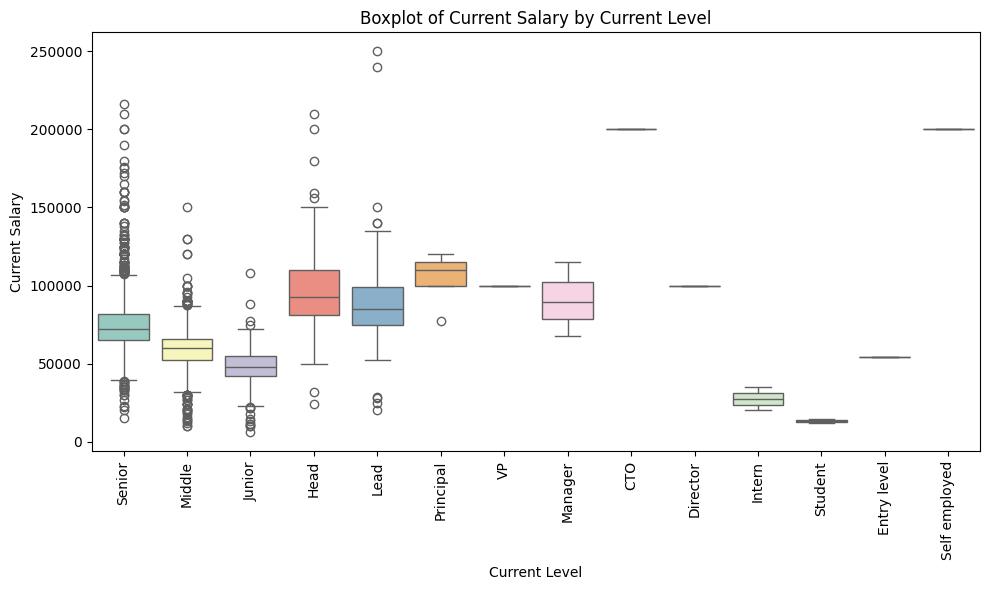

In [5]:
plt.figure(figsize=(10, 6))

# Use seaborn to draw boxplot according to 'Current Level' and 'Current Salary'
sns.boxplot(x='Current level', y='Current Salary', data=df , hue='Current level', palette='Set3')
plt.title('Boxplot of Current Salary by Current Level')
plt.xlabel('Current Level')
plt.ylabel('Current Salary')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

We explain some current level:
- Principle: They are often senior technical experts responsible, so it can be understood as equivalent to senior.
- VP: Generally responsible for the design, development and implementation of organizational information systems, software applications, and IT support and infrastructure systems.

### Insight:
- Senior position have so many outliner (high direction). That means that not only are there average salaries, there are also many other high salaries that a senior can achieve.
- There are a few positions that appear very rarely, sometimes only once.
- Head and lead postion salaries fluctuate the most.

# Question 2
## What is the salary of data related positions in 2018-2020?
### Meaning
- Know the salary of data positions so that coders have more motivation in the data field
- If a person feels that this data position is not suitable, they can move to another position that is more suitable for data without having to learn too much about other things.
### Answering
    Using bar plot to visualize the distribution of salaries of each level below:

#### #Preprocessing before visualize

In [6]:
data_positions = df[df['Position'].str.contains('Data', case=False)]['Position'].unique()
data_positions = pd.Series(data_positions)
# Make a copy of  data_positions and convert to lower case
data_positions_lowercase = data_positions.str.lower().copy()

# Find 'engineer' with regex
engineer_positions = data_positions_lowercase[data_positions_lowercase.str.contains('engineer', regex=True, na=False)].unique().tolist()

data_engineer_replace = []
for value in data_positions:
    if value.lower() in engineer_positions:
        data_engineer_replace.append(value)

# Convert similar positions to the same format
# Convert positions equivalent to Data Engineer to Data Engineer
df['Position'] = df['Position'].replace(data_engineer_replace,"Data Engineer")

# Convert positions equivalent to Data Scientist to Data Scientist
data_scientist_replace = ["Data scientist", 'data scientist', 'Senior Data Scientist']
df['Position'] = df['Position'].replace(data_scientist_replace,"Data Scientist")
df['Position'] = df['Position'].replace('Data science team lead',"Data Science Team Lead")

# Convert positions equivalent to Data Analyst to Data Analyst
data_analyst_replace = ['Data analyst', 'Data analyst ', 'DB developer/Data analyst', 'Data Analyst ']
df['Position'] = df['Position'].replace(data_analyst_replace,'Data Analyst')



#### #Visualize

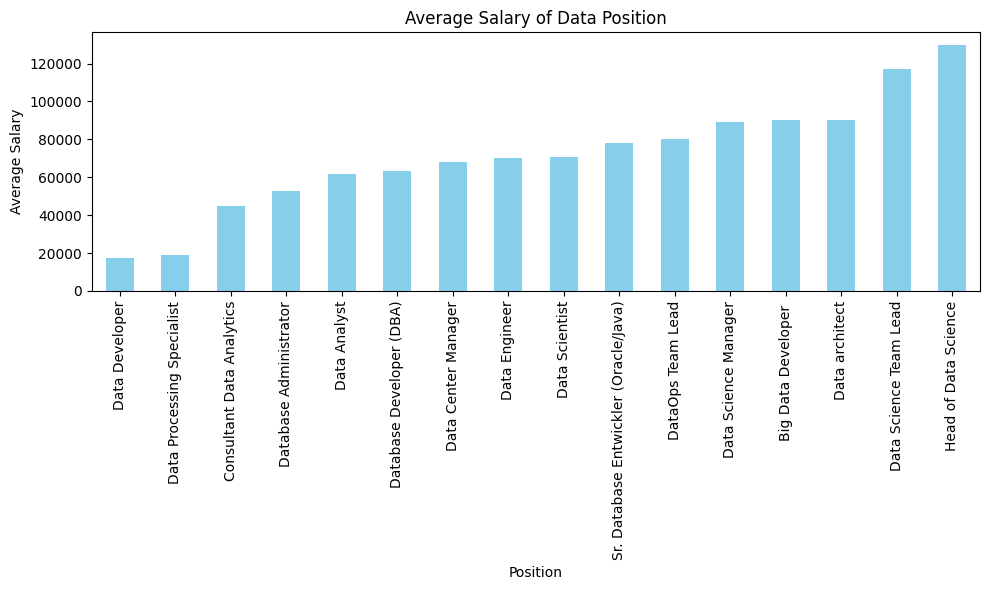

In [7]:

# Calculate the average salary for each position and save it into a Series
average_salary = df[df['Position'].isin(data_positions)].groupby('Position')['Current Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary of Data Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insight:
- Data-related positions have very, very high salaries.
- positions related to leader or head higher than 120,000$ per year.
- The remaining positions range from $20,000 to $80,000 per year.

=> The future salary of these industries will increase due to the growing big data.

# Question 3
## What is the age distribution in the IT field in the years 2018 - 2020?
### Meaning
- Know how the number of young people and veterans in the industry is distributed
- Knowing if you get older will gradually eliminate it or not
- Know the industry's level of rejection
### Answering
    Using histogram to visualize the distribution of salaries of each level below:

#### #Visualize

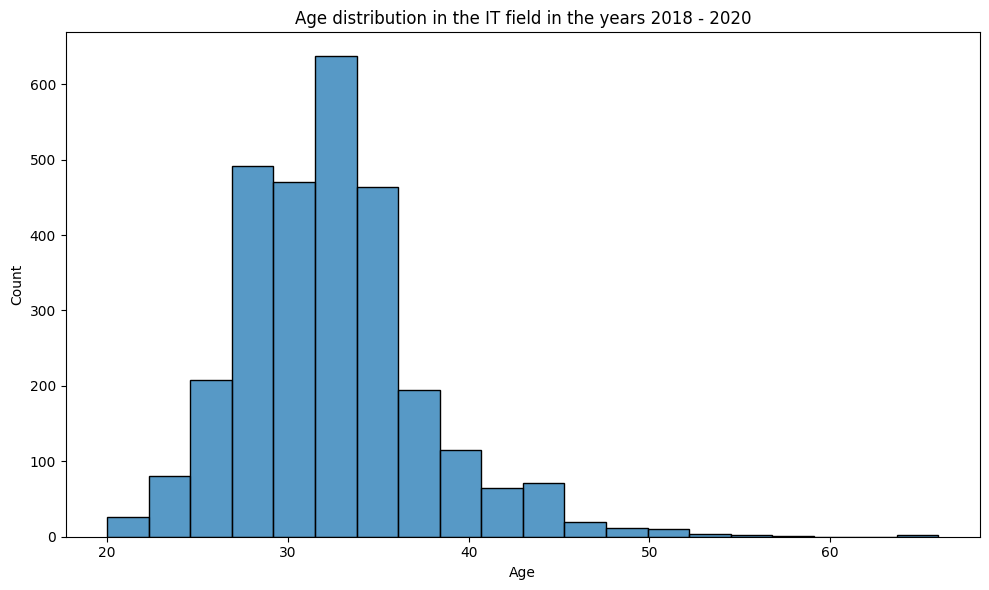

In [8]:
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ

# Sử dụng seaborn để vẽ histogram của 'Age'
sns.histplot(x='Age', data=df, bins=20)  

plt.title('Age distribution in the IT field in the years 2018 - 2020')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Insight:
According to histogram:
- The majority age is between 30 and 35 years old. But it also dropped very sharply between 35 and 40.
- Between 40 and 50, the remaining number of programmers is quite small and there are only a few people left in the 50 and 60 range.
- The number of young programmers in the years 2018-2020 is still quite small.

# Question 4
## What does the correlation between years of experience and salary look like? Does salary increase with years of experience?
### Meaning
- Know the correlation between salary and years of experience.
- Know the salary evolution at different experience levels
### Answering
    Using scatter plot to visualize the distribution of salaries of each level below:

#### #Visualize

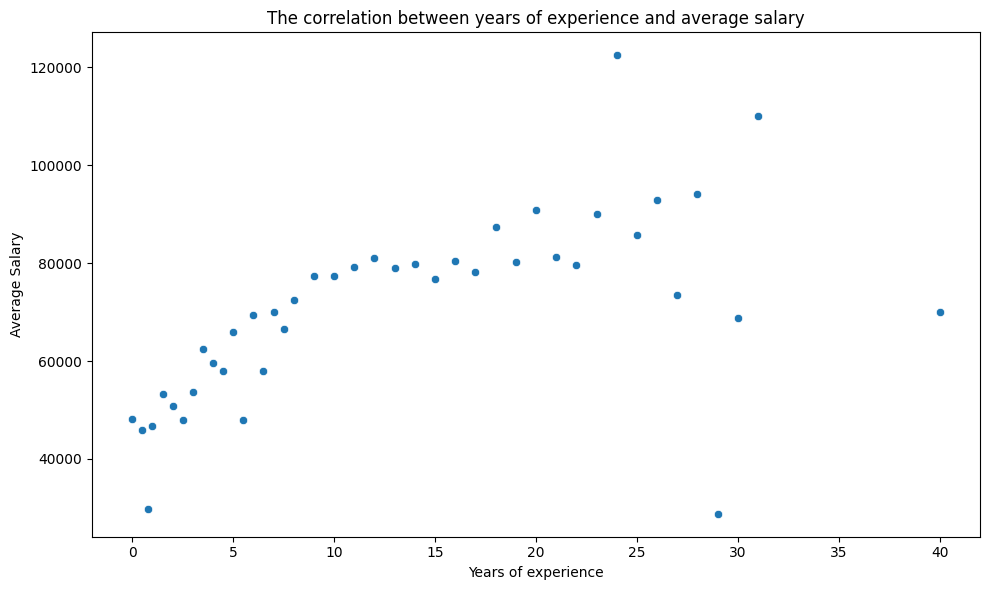

In [9]:
# Tính lương trung bình theo mức lương
average_salary = df.groupby('Years of experience')['Current Salary'].mean().reset_index(name='Average Salary')

# Vẽ scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of experience', y='Average Salary', data=average_salary)

plt.title('The correlation between years of experience and average salary')
plt.xlabel('Years of experience')
plt.ylabel('Average Salary')

plt.tight_layout()
plt.show()

### Insight
- From 0 to 10 year of experiences: Salary increased very high and doubled compared to the beginning
- From 10 to 20 year of experiences: Salary changes less frequently and is usually concentrated at 80,000 USD per year
- From 20 to 30 year of experiences: Salaries began to change dramatically and increase higher, however, the number of people with this level of experience also gradually decreased

### => The relationship between Years of experience and Average salary is a linear relationship.

# Question 5
## Which positions have the highest and lowest salaries in the IT field in 2018 - 2020?
### Meaning
- Know the positions with the highest salary and if young generation do not have much orientation in the IT field, they can consider these positions.
- In contrast to the highest salary position, if the younger generation does not have a direction, they can consider other positions for higher salaries.
### Answering
    Using bar plot to visualize  the highest and lowest of salaries of each level below:

#### #Preprocessing before visualize

In [10]:
df = df.drop(df[df['Position'] == 'Lawyer '].index)

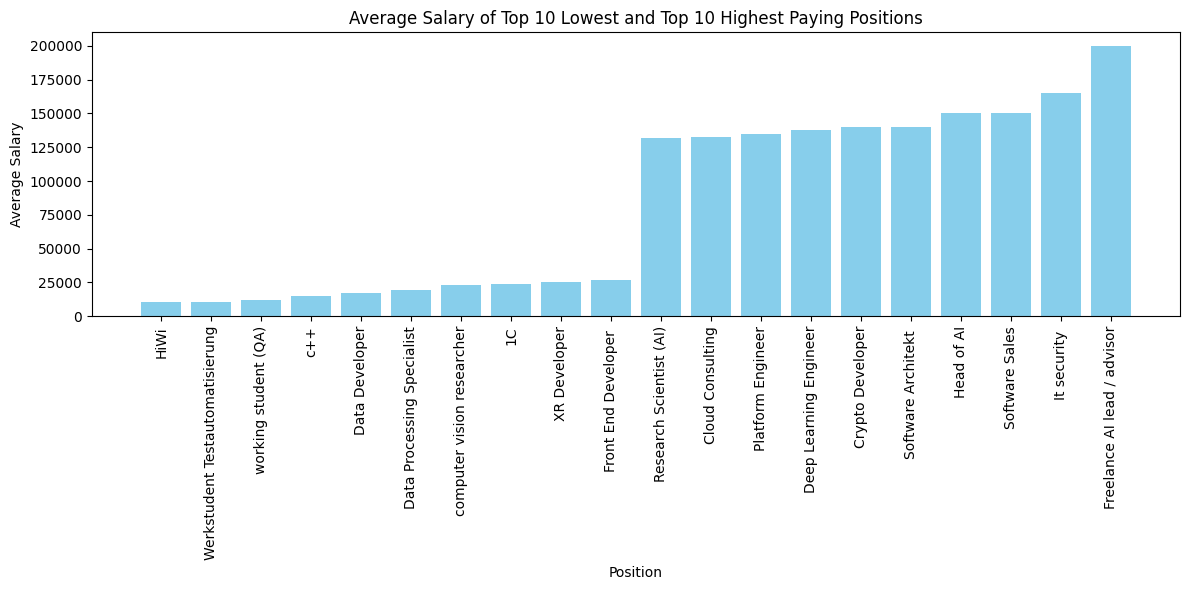

In [11]:

average_salary_by_position = df.groupby('Position')['Current Salary'].mean().reset_index()

# sort Salary 
average_salary_by_position = average_salary_by_position.sort_values(by='Current Salary')

# Select top 10 and bottom 10
lowest_salary_positions = average_salary_by_position.head(10)
highest_salary_positions = average_salary_by_position.tail(10)

selected_positions = pd.concat([lowest_salary_positions, highest_salary_positions])

# draw bar chart
plt.figure(figsize=(12, 6))
plt.bar(selected_positions['Position'], selected_positions['Current Salary'], color='skyblue')
plt.title('Average Salary of Top 10 Lowest and Top 10 Highest Paying Positions')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insight:
- Positions related to AI account for a fairly high percentage of the positions with the highest salaries.
- The positions with the lowest salaries have real salaries for Vietnamese people that are still very high.

=> Just do your best in IT field, you will receive a lot of money. If you want more, you can try in the field of AI.


# Question 6 
## What is the degree of correlation between numeric columns?

### Meaning
- Know the correlation between numeric data types


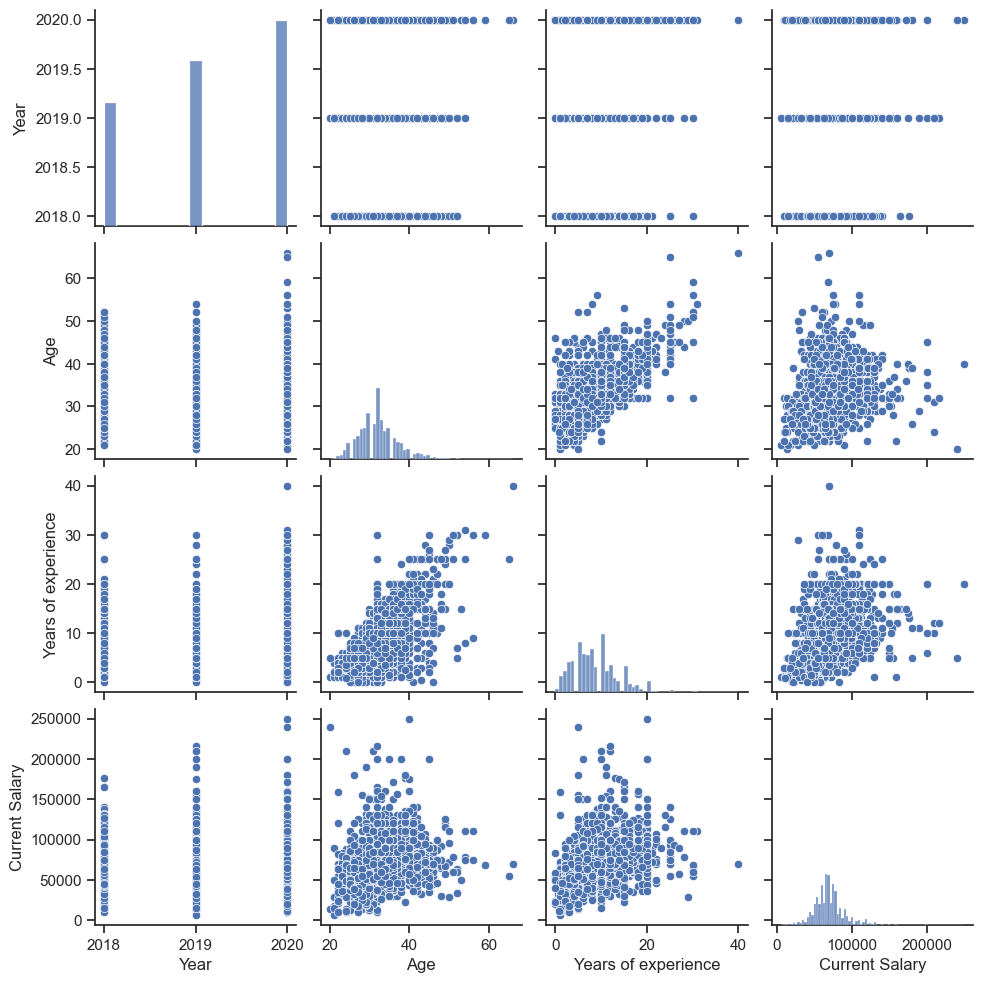

In [15]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()